<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Introduction to Probability Distribution**


Estimated time needed: **30** minutes


In this lab, you will familiarize yourself with the normal probability distributions and work on some exercises


## Objectives


*   Import Libraries
*   Introduction to Probability Distributions
    *   Normal Distributions
*   Lab Exercises


***


## Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


Import the libraries we need for the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt

Read in the csv file from the url using the request library


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
resp = await fetch(URL)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
ratings_df = pd.read_csv(ratings_url)

## Introduction to Probability Distribution


In this section, you will learn how to create the plot distributions using the scipy library in python


### Normal Distribution


A normal distribution is a bell-shaped density curve described by its mean μ and standard deviation σ. The curve is symmetrical and centered around it's mean. A normal distribution curve looks like this:


![image.png](attachment:image.png)


We can visualize the curve. Import norm from scipy.stat and plot graph with matplotlib


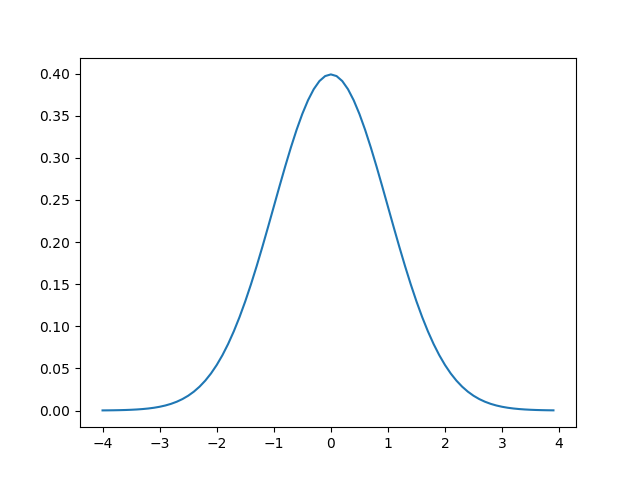

In [5]:
from scipy.stats import norm

# Plot between -4 and 4 with 0.1 steps.
x_axis = np.arange(-4, 4, 0.1)
# Mean = 0, SD = 1.
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

## Lab Exercises


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score of greater than 4.5


Find the mean and standard deviation of teachers' evaluation scores


In [6]:
eval_mean = round(ratings_df['eval'].mean(), 3)
eval_sd = round(ratings_df['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


Use the scipy.stats module. Because python only looks to the left i.e. less than, we do remove the probability from 1 to get the other side of the tail


In [7]:
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean)/eval_sd)
print(1 - prob0)

0.1828639734596742


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.5 and less than 4.2


First we find the probability of getting evaluation scores less than 3.5 using the <code>norm.cdf</code> function


In [8]:
x1 = 3.5
prob1 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print(prob1)

0.1847801491443654


Then for less than 4.2


In [9]:
x2 = 4.2
prob2 = scipy.stats.norm.cdf((x2 - eval_mean)/eval_sd)
print(prob2)

0.642057540461896


The probability of a teacher receiving an evaluation score that is between 3.5 and 4.2 is:


In [10]:
round((prob2 - prob1)*100, 1)

45.7

### Using the two-tailed test from a normal distribution:

*   A professional  basketball  team wants to compare its performance with  that of players  in a regional league.
*   The pros are known to have a historic mean of 12 points  per game with  a standard  deviation  of 5.5.
*   A group  of 36 regional players recorded on average 10.7 points  per game.
*   The pro coach would like to know whether  his professional  team scores on average are different from that of the regional players.


State the null hypothesis

*   $H\_0$: $x = µ\_1$ ("The mean point of the regional players is not different from the historic mean")
*   $H\_1$: $x ≠ µ\_1$ ("The mean point of the regional players is different from the historic mean")


When the population standard deviation is given and we are asked to deal with a sub-sample, the size (n) of the sub-sample is used in the formula:
![image.png](attachment:image.png)


In [11]:
## because it is a two-tailed test we multiply by 2
2*round(scipy.stats.norm.cdf((10.7 - 12)/(5.5/sqrt(36))), 3)

0.156

**Conclusion:** Because the p-value is greater than 0.05, we fail  to reject the null hypothesis as there is no sufficient evidence to prove that the mean point of the regional players is different from the historic mean


## Practice Questions


### Question 1: Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.3?


In [13]:
##calculate the probability less than 3.3
prob_less_than = scipy.stats.norm.cdf((3.3 - eval_mean)/eval_sd)
##then remove the probability from 1 to get the area to the right of 3.3
print(1 - prob_less_than)

0.8957422041794154


Double-click **here** for the solution.

<!-- The answer is below:
##calculate the probability less than 3.3
prob_less_than = scipy.stats.norm.cdf((3.3 - eval_mean)/eval_sd)
##then remove the probability from 1 to get the area to the right of 3.3
print(1 - prob_less_than)
-->


### Question 2: Using the teachers' rating dataset, what is the probability of receiving an evaluation score between 2 and 3?


In [14]:
## find the probablity of reciving a score of less than 2
prob_less_than_2 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print(prob_less_than_2)

## find the probablity of reciving a score of less than 3
prob_less_than_3 = scipy.stats.norm.cdf((x2 - eval_mean)/eval_sd)
print(prob_less_than_3)

## remove both probabilities from each other
round((prob_less_than_3 - prob_less_than_2)*100, 1)

0.1847801491443654
0.642057540461896


45.7

Double-click **here** for the solution.

<!-- The answer is below:
## find the probablity of reciving a score of less than 2
prob_less_than_2 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print(prob_less_than_2)

## find the probablity of reciving a score of less than 3
prob_less_than_3 = scipy.stats.norm.cdf((x2 - eval_mean)/eval_sd)
print(prob_less_than_3)

## remove both probabilities from each other
round((prob_less_than_3 - prob_less_than_2)*100, 1)
-->


### Question 3: To test the hypothesis that sleeping for at least 8 hours makes one smarter, 12 people who have slept for at least 8 hours every day  for the past one year  have their IQ tested.

*   Here are the results: 116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92
*   Test using the following hypotheses: H0: μ = 100 or Ha: μ > 100


In [15]:
### remember to remove from 1 because we want the value for when IQs are greater than 100
iqs = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
sample_size = len(iqs)
degree_freedom = sample_size - 1
iq_mean = sum(iqs) / sample_size
mean_diff = [(iq - iq_mean) ** 2 for iq in iqs]
iq_std = sqrt(sum(mean_diff) / degree_freedom)
variance = iq_std ** 2
print(f"IQ mean is {iq_mean}, sd is {iq_std}, variance is {variance}")
round(1-scipy.stats.norm.cdf((iq_mean - 100)/(iq_std/sqrt(12))), 3)

IQ mean is 106.0, sd is 8.831760866327848, variance is 78.00000000000001


0.009

Double-click **here** for a hint.

<!-- The hint is below:
### find the mean and standard deviation of the 12 IQs
iqs = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
sample_size = len(iqs)
degree_freedom = sample_size - 1
iq_mean = sum(iqs) / sample_size
mean_diff = [(iq - iq_mean) ** 2 for iq in iqs]
iq_std = sqrt(sum(mean_diff) / degree_freedom)
variance = iq_std ** 2
-->


Double-click **here** for the solution.

<!-- The answer is below:
### remember to remove from 1 because we want the value for when IQs are greater than 100
iqs = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
sample_size = len(iqs)
degree_freedom = sample_size - 1
iq_mean = sum(iqs) / sample_size
mean_diff = [(iq - iq_mean) ** 2 for iq in iqs]
iq_std = sqrt(sum(mean_diff) / degree_freedom)
variance = iq_std ** 2
print(f"IQ mean is {iq_mean}, sd is {iq_std}, variance is {variance}")
round(1-scipy.stats.norm.cdf((iq_mean - 100)/(iq_std/sqrt(12))), 3)
-->


## Authors

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork956-2022-01-01)

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


<hr>

## <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
